# Audio Effects Classification using Support-vector Machine

In [2]:
import numpy as np
import librosa
from pyAudioAnalysis import MidTermFeatures as aF
import os
import matplotlib.pyplot as plt
from IPython.display import Audio #todo remove
import re

import sklearn.svm
import sklearn.preprocessing as scale
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from tqdm.notebook import tqdm

# Load Files and Create Lables

In [3]:
root = 'IDMT-SMT-AUDIO-EFFECTS/Gitarre monophon/Samples'
root = r'C:\Users\Luca Gobbato\Desktop\guitar'
classes = []
fileList = []
fileLable = []
number_file = []

sub_dirs = [x[0] for x in os.walk(root)]

for sub_dir in sub_dirs[1:]:
    className = os.path.basename(sub_dir) # return the last term of path
    classes.append(className)
    
    prog_bar = tqdm(desc='Loading audio samples')
    prog_bar.reset(total=len(os.listdir(sub_dir))) 
    
    file_list = [f for f in os.listdir(sub_dir) if f.endswith('.wav')]
    
    for f in file_list:
        fileList.append(os.path.join(sub_dir,f))
        fileLable.append(className)
        prog_bar.update()
    prog_bar.refresh();
    
    number_file.append(len(os.listdir(sub_dir)))

print(number_file)    
print(classes)
len(fileList)
# print(fileLable)

Loading audio samples: 0it [00:00, ?it/s]

Loading audio samples: 0it [00:00, ?it/s]

Loading audio samples: 0it [00:00, ?it/s]

[1872, 624, 1872]
['Distortion', 'NoFX', 'Tremolo']


4368

# Compute Features

In [4]:
n_mfcc = 40 # 13
samples = len(fileList)
mfcc_ft = np.zeros((samples, n_mfcc))
zcr_ft = np.zeros((samples,173))
sc_ft = np.zeros((samples,173))

fs_sample = np.zeros((samples,1))
min_max = np.zeros((samples,2))

audio = []

prog_bar = tqdm(desc='Extracting features')
prog_bar.reset(total=samples) 

for index, f in enumerate(fileList): 
    audio, fs = librosa.load(f, sr=None)
    
    fs_sample[index] = fs;
    min_max[index,0] = np.min(audio)
    min_max[index,1] = np.max(audio)
    
    # result get unsable with normalization...
    audio = audio / np.abs(audio).max()
#     audio = scale.minmax_scale(audio,feature_range=(-1,1),axis=0)
    
    mfcc = librosa.feature.mfcc(y=audio,sr=fs,n_fft=2048,hop_length=512,window='hamming',n_mels=40,fmin=80,fmax=8000,
                                n_mfcc=n_mfcc,norm='ortho')
    mfcc_ft[index, :] = np.mean(mfcc, axis=1) 
    
    zcr = librosa.feature.zero_crossing_rate(y=audio, frame_length=2048, hop_length=512, center=True)
    zcr_ft[index, :] = zcr
    
    sc = librosa.feature.spectral_centroid(y=audio, sr=fs, n_fft=2048, hop_length=512, freq=None)
    sc_ft[index, :] = sc
    
    prog_bar.update()
prog_bar.refresh();

Extracting features: 0it [00:00, ?it/s]

In [15]:
features = np.concatenate(( mfcc_ft ,np.stack([np.mean( zcr_ft , axis=1),np.mean( sc_ft , axis=1)],axis=1) ), axis=1)
features_original = scale.minmax_scale(features)
print(features_original.shape)

(4368, 42)


[44100.]


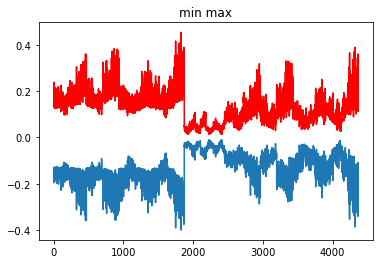

In [877]:
# checking dataset
print(np.unique(fs_sample))
plt.plot(min_max[:,0])
plt.plot(min_max[:,1], 'r')
plt.title('min max')
plt.show()

In [984]:
print('short term windows', [ 0.02*fs, 0.02*fs ])
print('try whith', 2048/fs)

short term windows [882.0, 882.0]
try whith 0.046439909297052155


In [50]:
root = r'C:\Users\Luca Gobbato\Desktop\guitar'
path_list = [root + '\Tremolo']
path_list.append(r'C:\Users\Luca Gobbato\Desktop\guitar\NoFx')
path_list.append(root + '\Distortion')

# path_list = [r'C:\Users\Luca Gobbato\Desktop\guitar']

# mid_window, mid_step,short_window, short_step = 1, 1, 0.02, 0.02 #seconds
mid_window, mid_step,short_window, short_step = 1, 1, 0.046439909297052155, 0.046439909297052155/4

# pyAudioAnalysis.MidTermFeatures.
features_audio, class_names, file_names = [], [], []
features_audio, class_names, file_names = aF.multiple_directory_feature_extraction(path_list, mid_window, mid_step,
                                          short_window, short_step,
                                          compute_beat=False)

Analyzing file 1 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-40100-3341-33697.wav
Analyzing file 2 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-40100-3342-34321.wav
Analyzing file 3 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-40100-3343-34945.wav
Analyzing file 4 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-41101-3341-33698.wav
Analyzing file 5 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-41101-3342-34322.wav
Analyzing file 6 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-41101-3343-34946.wav
Analyzing file 7 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-42102-3341-33699.wav
Analyzing file 8 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-42102-3342-34323.wav
Analyzing file 9 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-42102-3343-34947.wav
Analyzing file 10 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-43103-3341-33700.wav
Analyzing file 11 of 1872: C:\Users\Luc

Analyzing file 86 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55210-3342-34344.wav
Analyzing file 87 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55210-3343-34968.wav
Analyzing file 88 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55305-3341-33728.wav
Analyzing file 89 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55305-3342-34352.wav
Analyzing file 90 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55305-3343-34976.wav
Analyzing file 91 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55400-3341-33736.wav
Analyzing file 92 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55400-3342-34360.wav
Analyzing file 93 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55400-3343-34984.wav
Analyzing file 94 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-56211-3341-33721.wav
Analyzing file 95 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-56211-3342-34345.wav
Analyzing file 96 of 1872: C:\

Analyzing file 170 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65410-3342-34370.wav
Analyzing file 171 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65410-3343-34994.wav
Analyzing file 172 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65506-3341-33755.wav
Analyzing file 173 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65506-3342-34379.wav
Analyzing file 174 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65506-3343-35003.wav
Analyzing file 175 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65601-3341-33763.wav
Analyzing file 176 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65601-3342-34387.wav
Analyzing file 177 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65601-3343-35011.wav
Analyzing file 178 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-66411-3341-33747.wav
Analyzing file 179 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-66411-3342-34371.wav
Analyzing file 180 o

Analyzing file 254 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-45200-3342-34412.wav
Analyzing file 255 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-45200-3343-35036.wav
Analyzing file 256 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-46106-3341-33781.wav
Analyzing file 257 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-46106-3342-34405.wav
Analyzing file 258 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-46106-3343-35029.wav
Analyzing file 259 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-46201-3341-33789.wav
Analyzing file 260 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-46201-3342-34413.wav
Analyzing file 261 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-46201-3343-35037.wav
Analyzing file 262 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-47107-3341-33782.wav
Analyzing file 263 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-47107-3342-34406.wav
Analyzing file 264 o

Analyzing file 338 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57212-3342-34424.wav
Analyzing file 339 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57212-3343-35048.wav
Analyzing file 340 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57307-3341-33808.wav
Analyzing file 341 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57307-3342-34432.wav
Analyzing file 342 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57307-3343-35056.wav
Analyzing file 343 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57402-3341-33816.wav
Analyzing file 344 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57402-3342-34440.wav
Analyzing file 345 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57402-3343-35064.wav
Analyzing file 346 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-58308-3341-33809.wav
Analyzing file 347 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-58308-3342-34433.wav
Analyzing file 348 o

Analyzing file 422 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67412-3342-34450.wav
Analyzing file 423 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67412-3343-35074.wav
Analyzing file 424 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67508-3341-33835.wav
Analyzing file 425 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67508-3342-34459.wav
Analyzing file 426 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67508-3343-35083.wav
Analyzing file 427 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67603-3341-33843.wav
Analyzing file 428 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67603-3342-34467.wav
Analyzing file 429 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67603-3343-35091.wav
Analyzing file 430 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-68509-3341-33836.wav
Analyzing file 431 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-68509-3342-34460.wav
Analyzing file 432 o

Analyzing file 506 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-48203-3342-34493.wav
Analyzing file 507 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-48203-3343-35117.wav
Analyzing file 508 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-49109-3341-33862.wav
Analyzing file 509 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-49109-3342-34486.wav
Analyzing file 510 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-49109-3343-35110.wav
Analyzing file 511 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-49204-3341-33870.wav
Analyzing file 512 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-49204-3342-34494.wav
Analyzing file 513 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-49204-3343-35118.wav
Analyzing file 514 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-50110-3341-33863.wav
Analyzing file 515 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-50110-3342-34487.wav
Analyzing file 516 o

Analyzing file 590 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-59404-3342-34520.wav
Analyzing file 591 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-59404-3343-35144.wav
Analyzing file 592 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-59500-3341-33905.wav
Analyzing file 593 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-59500-3342-34529.wav
Analyzing file 594 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-59500-3343-35153.wav
Analyzing file 595 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-60310-3341-33889.wav
Analyzing file 596 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-60310-3342-34513.wav
Analyzing file 597 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-60310-3343-35137.wav
Analyzing file 598 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-60405-3341-33897.wav
Analyzing file 599 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-60405-3342-34521.wav
Analyzing file 600 o

Analyzing file 674 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-69605-3342-34547.wav
Analyzing file 675 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-69605-3343-35171.wav
Analyzing file 676 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-70511-3341-33916.wav
Analyzing file 677 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-70511-3342-34540.wav
Analyzing file 678 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-70511-3343-35164.wav
Analyzing file 679 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-70606-3341-33924.wav
Analyzing file 680 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-70606-3342-34548.wav
Analyzing file 681 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-70606-3343-35172.wav
Analyzing file 682 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-71512-3341-33917.wav
Analyzing file 683 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-71512-3342-34541.wav
Analyzing file 684 o

Analyzing file 758 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-51111-3342-34566.wav
Analyzing file 759 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-51111-3343-35190.wav
Analyzing file 760 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-51206-3341-33950.wav
Analyzing file 761 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-51206-3342-34574.wav
Analyzing file 762 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-51206-3343-35198.wav
Analyzing file 763 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-51301-3341-33958.wav
Analyzing file 764 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-51301-3342-34582.wav
Analyzing file 765 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-51301-3343-35206.wav
Analyzing file 766 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-52112-3341-33943.wav
Analyzing file 767 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-52112-3342-34567.wav
Analyzing file 768 o

Analyzing file 842 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-61406-3342-34600.wav
Analyzing file 843 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-61406-3343-35224.wav
Analyzing file 844 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-61502-3341-33985.wav
Analyzing file 845 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-61502-3342-34609.wav
Analyzing file 846 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-61502-3343-35233.wav
Analyzing file 847 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-62312-3341-33969.wav
Analyzing file 848 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-62312-3342-34593.wav
Analyzing file 849 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-62312-3343-35217.wav
Analyzing file 850 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-62407-3341-33977.wav
Analyzing file 851 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-62407-3342-34601.wav
Analyzing file 852 o

Analyzing file 926 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-73609-3342-34629.wav
Analyzing file 927 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-73609-3343-35253.wav
Analyzing file 928 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-74610-3341-34006.wav
Analyzing file 929 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-74610-3342-34630.wav
Analyzing file 930 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-74610-3343-35254.wav
Analyzing file 931 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-75611-3341-34007.wav
Analyzing file 932 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-75611-3342-34631.wav
Analyzing file 933 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-75611-3343-35255.wav
Analyzing file 934 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-76612-3341-34008.wav
Analyzing file 935 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-76612-3342-34632.wav
Analyzing file 936 o

Analyzing file 1010 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-53208-3342-34654.wav
Analyzing file 1011 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-53208-3343-35278.wav
Analyzing file 1012 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-53303-3341-34038.wav
Analyzing file 1013 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-53303-3342-34662.wav
Analyzing file 1014 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-53303-3343-35286.wav
Analyzing file 1015 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-54209-3341-34031.wav
Analyzing file 1016 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-54209-3342-34655.wav
Analyzing file 1017 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-54209-3343-35279.wav
Analyzing file 1018 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-54304-3341-34039.wav
Analyzing file 1019 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-54304-3342-34663.wav
Analyzing 

Analyzing file 1093 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-63504-3341-34065.wav
Analyzing file 1094 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-63504-3342-34689.wav
Analyzing file 1095 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-63504-3343-35313.wav
Analyzing file 1096 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64409-3341-34057.wav
Analyzing file 1097 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64409-3342-34681.wav
Analyzing file 1098 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64409-3343-35305.wav
Analyzing file 1099 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64505-3341-34066.wav
Analyzing file 1100 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64505-3342-34690.wav
Analyzing file 1101 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64505-3343-35314.wav
Analyzing file 1102 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64600-3341-34074.wav
Analyzing 

Analyzing file 1176 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-41101-3343-35336.wav
Analyzing file 1177 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-42102-3341-34089.wav
Analyzing file 1178 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-42102-3342-34713.wav
Analyzing file 1179 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-42102-3343-35337.wav
Analyzing file 1180 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-43103-3341-34090.wav
Analyzing file 1181 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-43103-3342-34714.wav
Analyzing file 1182 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-43103-3343-35338.wav
Analyzing file 1183 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-44104-3341-34091.wav
Analyzing file 1184 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-44104-3342-34715.wav
Analyzing file 1185 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-44104-3343-35339.wav
Analyzing 

Analyzing file 1259 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-55305-3342-34742.wav
Analyzing file 1260 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-55305-3343-35366.wav
Analyzing file 1261 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-55400-3341-34126.wav
Analyzing file 1262 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-55400-3342-34750.wav
Analyzing file 1263 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-55400-3343-35374.wav
Analyzing file 1264 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-56211-3341-34111.wav
Analyzing file 1265 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-56211-3342-34735.wav
Analyzing file 1266 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-56211-3343-35359.wav
Analyzing file 1267 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-56306-3341-34119.wav
Analyzing file 1268 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-56306-3342-34743.wav
Analyzing 

Analyzing file 1342 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-65506-3341-34145.wav
Analyzing file 1343 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-65506-3342-34769.wav
Analyzing file 1344 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-65506-3343-35393.wav
Analyzing file 1345 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-65601-3341-34153.wav
Analyzing file 1346 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-65601-3342-34777.wav
Analyzing file 1347 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-65601-3343-35401.wav
Analyzing file 1348 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-66411-3341-34137.wav
Analyzing file 1349 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-66411-3342-34761.wav
Analyzing file 1350 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-66411-3343-35385.wav
Analyzing file 1351 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-66507-3341-34146.wav
Analyzing 

Analyzing file 1425 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-45200-3343-35426.wav
Analyzing file 1426 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-46106-3341-34171.wav
Analyzing file 1427 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-46106-3342-34795.wav
Analyzing file 1428 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-46106-3343-35419.wav
Analyzing file 1429 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-46201-3341-34179.wav
Analyzing file 1430 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-46201-3342-34803.wav
Analyzing file 1431 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-46201-3343-35427.wav
Analyzing file 1432 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-47107-3341-34172.wav
Analyzing file 1433 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-47107-3342-34796.wav
Analyzing file 1434 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-47107-3343-35420.wav
Analyzing 

Analyzing file 1508 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-57212-3342-34814.wav
Analyzing file 1509 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-57212-3343-35438.wav
Analyzing file 1510 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-57307-3341-34198.wav
Analyzing file 1511 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-57307-3342-34822.wav
Analyzing file 1512 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-57307-3343-35446.wav
Analyzing file 1513 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-57402-3341-34206.wav
Analyzing file 1514 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-57402-3342-34830.wav
Analyzing file 1515 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-57402-3343-35454.wav
Analyzing file 1516 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-58308-3341-34199.wav
Analyzing file 1517 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-58308-3342-34823.wav
Analyzing 

Analyzing file 1591 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-67412-3341-34216.wav
Analyzing file 1592 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-67412-3342-34840.wav
Analyzing file 1593 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-67412-3343-35464.wav
Analyzing file 1594 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-67508-3341-34225.wav
Analyzing file 1595 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-67508-3342-34849.wav
Analyzing file 1596 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-67508-3343-35473.wav
Analyzing file 1597 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-67603-3341-34233.wav
Analyzing file 1598 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-67603-3342-34857.wav
Analyzing file 1599 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-67603-3343-35481.wav
Analyzing file 1600 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-68509-3341-34226.wav
Analyzing 

Analyzing file 1674 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-48108-3343-35499.wav
Analyzing file 1675 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-48203-3341-34259.wav
Analyzing file 1676 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-48203-3342-34883.wav
Analyzing file 1677 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-48203-3343-35507.wav
Analyzing file 1678 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-49109-3341-34252.wav
Analyzing file 1679 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-49109-3342-34876.wav
Analyzing file 1680 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-49109-3343-35500.wav
Analyzing file 1681 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-49204-3341-34260.wav
Analyzing file 1682 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-49204-3342-34884.wav
Analyzing file 1683 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-49204-3343-35508.wav
Analyzing 

Analyzing file 1757 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-59309-3342-34902.wav
Analyzing file 1758 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-59309-3343-35526.wav
Analyzing file 1759 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-59404-3341-34286.wav
Analyzing file 1760 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-59404-3342-34910.wav
Analyzing file 1761 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-59404-3343-35534.wav
Analyzing file 1762 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-59500-3341-34295.wav
Analyzing file 1763 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-59500-3342-34919.wav
Analyzing file 1764 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-59500-3343-35543.wav
Analyzing file 1765 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-60310-3341-34279.wav
Analyzing file 1766 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-60310-3342-34903.wav
Analyzing 

C:\Users\Luca Gobbato\anaconda3\envs\CMLS\lib\site-packages\pyAudioAnalysis\ShortTermFeatures.py:62: RuntimeWarning: invalid value encountered in true_divide
  Xt = Xt / Xt.max()
C:\Users\Luca Gobbato\anaconda3\envs\CMLS\lib\site-packages\pyAudioAnalysis\ShortTermFeatures.py:297: RuntimeWarning: invalid value encountered in true_divide
  final_matrix /= spec.sum()


Analyzing file 1809 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65410-3343-35540.wav
Analyzing file 1810 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65506-3341-34301.wav
Analyzing file 1811 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65506-3342-34925.wav
Analyzing file 1812 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65506-3343-35549.wav
Analyzing file 1813 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65601-3341-34309.wav
Analyzing file 1814 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65601-3342-34933.wav
Analyzing file 1815 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65601-3343-35557.wav
Analyzing file 1816 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-66411-3341-34293.wav
Analyzing file 1817 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-66411-3342-34917.wav
Analyzing file 1818 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-66411-3343-35541.wav
Analyzing 

Analyzing file 21 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-51301-1111-20620.wav
Analyzing file 22 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-52112-1111-20605.wav
Analyzing file 23 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-52207-1111-20613.wav
Analyzing file 24 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-52302-1111-20621.wav
Analyzing file 25 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-53208-1111-20614.wav
Analyzing file 26 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-53303-1111-20622.wav
Analyzing file 27 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-54209-1111-20615.wav
Analyzing file 28 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-54304-1111-20623.wav
Analyzing file 29 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-55210-1111-20616.wav
Analyzing file 30 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-55305-1111-20624.wav
Analyzing file 31 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G6

Analyzing file 109 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-55400-1111-20710.wav
Analyzing file 110 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-56211-1111-20695.wav
Analyzing file 111 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-56306-1111-20703.wav
Analyzing file 112 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-56401-1111-20711.wav
Analyzing file 113 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-57212-1111-20696.wav
Analyzing file 114 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-57307-1111-20704.wav
Analyzing file 115 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-57402-1111-20712.wav
Analyzing file 116 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-58308-1111-20705.wav
Analyzing file 117 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-58403-1111-20713.wav
Analyzing file 118 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-59309-1111-20706.wav
Analyzing file 119 of 624: C:\Users\Luca Gobbato\Desktop\gui

Analyzing file 197 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-59404-1111-20792.wav
Analyzing file 198 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-59500-1111-20801.wav
Analyzing file 199 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-60310-1111-20785.wav
Analyzing file 200 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-60405-1111-20793.wav
Analyzing file 201 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-60501-1111-20802.wav
Analyzing file 202 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-61311-1111-20786.wav
Analyzing file 203 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-61406-1111-20794.wav
Analyzing file 204 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-61502-1111-20803.wav
Analyzing file 205 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-62312-1111-20787.wav
Analyzing file 206 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-62407-1111-20795.wav
Analyzing file 207 of 624: C:\Users\Luca Gobbato\Desktop\gui

Analyzing file 285 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-62503-1111-20882.wav
Analyzing file 286 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-63408-1111-20874.wav
Analyzing file 287 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-63504-1111-20883.wav
Analyzing file 288 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-64409-1111-20875.wav
Analyzing file 289 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-64505-1111-20884.wav
Analyzing file 290 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-64600-1111-20892.wav
Analyzing file 291 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-65410-1111-20876.wav
Analyzing file 292 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-65506-1111-20885.wav
Analyzing file 293 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-65601-1111-20893.wav
Analyzing file 294 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-66411-1111-20877.wav
Analyzing file 295 of 624: C:\Users\Luca Gobbato\Desktop\gui

Analyzing file 373 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-66507-1111-20964.wav
Analyzing file 374 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-66602-1111-20972.wav
Analyzing file 375 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-67412-1111-20956.wav
Analyzing file 376 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-67508-1111-20965.wav
Analyzing file 377 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-67603-1111-20973.wav
Analyzing file 378 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-68509-1111-20966.wav
Analyzing file 379 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-68604-1111-20974.wav
Analyzing file 380 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-69510-1111-20967.wav
Analyzing file 381 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-69605-1111-20975.wav
Analyzing file 382 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-70511-1111-20968.wav
Analyzing file 383 of 624: C:\Users\Luca Gobbato\Desktop\gui

Analyzing file 461 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-70606-1111-21054.wav
Analyzing file 462 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-71512-1111-21047.wav
Analyzing file 463 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-71607-1111-21055.wav
Analyzing file 464 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-72608-1111-21056.wav
Analyzing file 465 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-73609-1111-21057.wav
Analyzing file 466 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-74610-1111-21058.wav
Analyzing file 467 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-75611-1111-21059.wav
Analyzing file 468 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-76612-1111-21060.wav
Analyzing file 469 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G91-40100-1111-21061.wav
Analyzing file 470 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G91-41101-1111-21062.wav
Analyzing file 471 of 624: C:\Users\Luca Gobbato\Desktop\gui

Analyzing file 549 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-42102-1111-21141.wav
Analyzing file 550 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-43103-1111-21142.wav
Analyzing file 551 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-44104-1111-21143.wav
Analyzing file 552 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-45105-1111-21144.wav
Analyzing file 553 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-45200-1111-21152.wav
Analyzing file 554 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-46106-1111-21145.wav
Analyzing file 555 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-46201-1111-21153.wav
Analyzing file 556 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-47107-1111-21146.wav
Analyzing file 557 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-47202-1111-21154.wav
Analyzing file 558 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-48108-1111-21147.wav
Analyzing file 559 of 624: C:\Users\Luca Gobbato\Desktop\gui

Analyzing file 12 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-43103-4413-38692.wav
Analyzing file 13 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-44104-4411-37445.wav
Analyzing file 14 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-44104-4412-38069.wav
Analyzing file 15 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-44104-4413-38693.wav
Analyzing file 16 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-45105-4411-37446.wav
Analyzing file 17 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-45105-4412-38070.wav
Analyzing file 18 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-45105-4413-38694.wav
Analyzing file 19 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-45200-4411-37454.wav
Analyzing file 20 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-45200-4412-38078.wav
Analyzing file 21 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-45200-4413-38702.wav


Analyzing file 94 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56211-4411-37465.wav
Analyzing file 95 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56211-4412-38089.wav
Analyzing file 96 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56211-4413-38713.wav
Analyzing file 97 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56306-4411-37473.wav
Analyzing file 98 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56306-4412-38097.wav
Analyzing file 99 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56306-4413-38721.wav
Analyzing file 100 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56401-4411-37481.wav
Analyzing file 101 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56401-4412-38105.wav
Analyzing file 102 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56401-4413-38729.wav
Analyzing file 103 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-57212-4411-37466.

Analyzing file 176 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-65601-4412-38131.wav
Analyzing file 177 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-65601-4413-38755.wav
Analyzing file 178 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66411-4411-37491.wav
Analyzing file 179 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66411-4412-38115.wav
Analyzing file 180 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66411-4413-38739.wav
Analyzing file 181 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66507-4411-37500.wav
Analyzing file 182 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66507-4412-38124.wav
Analyzing file 183 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66507-4413-38748.wav
Analyzing file 184 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66602-4411-37508.wav
Analyzing file 185 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66602-4412-

Analyzing file 258 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-46106-4413-38773.wav
Analyzing file 259 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-46201-4411-37533.wav
Analyzing file 260 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-46201-4412-38157.wav
Analyzing file 261 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-46201-4413-38781.wav
Analyzing file 262 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-47107-4411-37526.wav
Analyzing file 263 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-47107-4412-38150.wav
Analyzing file 264 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-47107-4413-38774.wav
Analyzing file 265 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-47202-4411-37534.wav
Analyzing file 266 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-47202-4412-38158.wav
Analyzing file 267 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-47202-4413-

Analyzing file 340 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-57307-4411-37552.wav
Analyzing file 341 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-57307-4412-38176.wav
Analyzing file 342 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-57307-4413-38800.wav
Analyzing file 343 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-57402-4411-37560.wav
Analyzing file 344 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-57402-4412-38184.wav
Analyzing file 345 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-57402-4413-38808.wav
Analyzing file 346 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-58308-4411-37553.wav
Analyzing file 347 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-58308-4412-38177.wav
Analyzing file 348 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-58308-4413-38801.wav
Analyzing file 349 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-58403-4411-

Analyzing file 422 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67412-4412-38194.wav
Analyzing file 423 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67412-4413-38818.wav
Analyzing file 424 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67508-4411-37579.wav
Analyzing file 425 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67508-4412-38203.wav
Analyzing file 426 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67508-4413-38827.wav
Analyzing file 427 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67603-4411-37587.wav
Analyzing file 428 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67603-4412-38211.wav
Analyzing file 429 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67603-4413-38835.wav
Analyzing file 430 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-68509-4411-37580.wav
Analyzing file 431 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-68509-4412-

Analyzing file 504 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-48108-4413-38853.wav
Analyzing file 505 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-48203-4411-37613.wav
Analyzing file 506 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-48203-4412-38237.wav
Analyzing file 507 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-48203-4413-38861.wav
Analyzing file 508 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-49109-4411-37606.wav
Analyzing file 509 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-49109-4412-38230.wav
Analyzing file 510 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-49109-4413-38854.wav
Analyzing file 511 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-49204-4411-37614.wav
Analyzing file 512 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-49204-4412-38238.wav
Analyzing file 513 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-49204-4413-

Analyzing file 586 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59309-4411-37632.wav
Analyzing file 587 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59309-4412-38256.wav
Analyzing file 588 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59309-4413-38880.wav
Analyzing file 589 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59404-4411-37640.wav
Analyzing file 590 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59404-4412-38264.wav
Analyzing file 591 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59404-4413-38888.wav
Analyzing file 592 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59500-4411-37649.wav
Analyzing file 593 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59500-4412-38273.wav
Analyzing file 594 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59500-4413-38897.wav
Analyzing file 595 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-60310-4411-

Analyzing file 668 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-68604-4412-38290.wav
Analyzing file 669 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-68604-4413-38914.wav
Analyzing file 670 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-69510-4411-37659.wav
Analyzing file 671 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-69510-4412-38283.wav
Analyzing file 672 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-69510-4413-38907.wav
Analyzing file 673 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-69605-4411-37667.wav
Analyzing file 674 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-69605-4412-38291.wav
Analyzing file 675 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-69605-4413-38915.wav
Analyzing file 676 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-70511-4411-37660.wav
Analyzing file 677 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-70511-4412-

Analyzing file 750 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-50110-4413-38933.wav
Analyzing file 751 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-50205-4411-37693.wav
Analyzing file 752 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-50205-4412-38317.wav
Analyzing file 753 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-50205-4413-38941.wav
Analyzing file 754 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-50300-4411-37701.wav
Analyzing file 755 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-50300-4412-38325.wav
Analyzing file 756 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-50300-4413-38949.wav
Analyzing file 757 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-51111-4411-37686.wav
Analyzing file 758 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-51111-4412-38310.wav
Analyzing file 759 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-51111-4413-

Analyzing file 832 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-60405-4411-37719.wav
Analyzing file 833 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-60405-4412-38343.wav
Analyzing file 834 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-60405-4413-38967.wav
Analyzing file 835 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-60501-4411-37728.wav
Analyzing file 836 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-60501-4412-38352.wav
Analyzing file 837 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-60501-4413-38976.wav
Analyzing file 838 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-61311-4411-37712.wav
Analyzing file 839 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-61311-4412-38336.wav
Analyzing file 840 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-61311-4413-38960.wav
Analyzing file 841 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-61406-4411-

Analyzing file 914 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-70606-4412-38370.wav
Analyzing file 915 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-70606-4413-38994.wav
Analyzing file 916 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-71512-4411-37739.wav
Analyzing file 917 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-71512-4412-38363.wav
Analyzing file 918 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-71512-4413-38987.wav
Analyzing file 919 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-71607-4411-37747.wav
Analyzing file 920 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-71607-4412-38371.wav
Analyzing file 921 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-71607-4413-38995.wav
Analyzing file 922 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-72608-4411-37748.wav
Analyzing file 923 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-72608-4412-

Analyzing file 996 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-51206-4413-39020.wav
Analyzing file 997 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-51301-4411-37780.wav
Analyzing file 998 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-51301-4412-38404.wav
Analyzing file 999 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-51301-4413-39028.wav
Analyzing file 1000 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52112-4411-37765.wav
Analyzing file 1001 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52112-4412-38389.wav
Analyzing file 1002 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52112-4413-39013.wav
Analyzing file 1003 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52207-4411-37773.wav
Analyzing file 1004 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52207-4412-38397.wav
Analyzing file 1005 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52207

Analyzing file 1077 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-61406-4413-39046.wav
Analyzing file 1078 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-61502-4411-37807.wav
Analyzing file 1079 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-61502-4412-38431.wav
Analyzing file 1080 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-61502-4413-39055.wav
Analyzing file 1081 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-62312-4411-37791.wav
Analyzing file 1082 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-62312-4412-38415.wav
Analyzing file 1083 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-62312-4413-39039.wav
Analyzing file 1084 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-62407-4411-37799.wav
Analyzing file 1085 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-62407-4412-38423.wav
Analyzing file 1086 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-6

Analyzing file 1158 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-72608-4413-39074.wav
Analyzing file 1159 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-73609-4411-37827.wav
Analyzing file 1160 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-73609-4412-38451.wav
Analyzing file 1161 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-73609-4413-39075.wav
Analyzing file 1162 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-74610-4411-37828.wav
Analyzing file 1163 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-74610-4412-38452.wav
Analyzing file 1164 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-74610-4413-39076.wav
Analyzing file 1165 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-75611-4411-37829.wav
Analyzing file 1166 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-75611-4412-38453.wav
Analyzing file 1167 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-7

Analyzing file 1239 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-52207-4413-39099.wav
Analyzing file 1240 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-52302-4411-37859.wav
Analyzing file 1241 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-52302-4412-38483.wav
Analyzing file 1242 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-52302-4413-39107.wav
Analyzing file 1243 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-53208-4411-37852.wav
Analyzing file 1244 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-53208-4412-38476.wav
Analyzing file 1245 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-53208-4413-39100.wav
Analyzing file 1246 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-53303-4411-37860.wav
Analyzing file 1247 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-53303-4412-38484.wav
Analyzing file 1248 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-5

Analyzing file 1320 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-62407-4413-39125.wav
Analyzing file 1321 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-62503-4411-37886.wav
Analyzing file 1322 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-62503-4412-38510.wav
Analyzing file 1323 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-62503-4413-39134.wav
Analyzing file 1324 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-63408-4411-37878.wav
Analyzing file 1325 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-63408-4412-38502.wav
Analyzing file 1326 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-63408-4413-39126.wav
Analyzing file 1327 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-63504-4411-37887.wav
Analyzing file 1328 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-63504-4412-38511.wav
Analyzing file 1329 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-6

Analyzing file 1401 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-75611-4413-39155.wav
Analyzing file 1402 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-76612-4411-37908.wav
Analyzing file 1403 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-76612-4412-38532.wav
Analyzing file 1404 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-76612-4413-39156.wav
Analyzing file 1405 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-40100-4411-37909.wav
Analyzing file 1406 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-40100-4412-38533.wav
Analyzing file 1407 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-40100-4413-39157.wav
Analyzing file 1408 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-41101-4411-37910.wav
Analyzing file 1409 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-41101-4412-38534.wav
Analyzing file 1410 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-4

Analyzing file 1482 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-53303-4413-39186.wav
Analyzing file 1483 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-54209-4411-37931.wav
Analyzing file 1484 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-54209-4412-38555.wav
Analyzing file 1485 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-54209-4413-39179.wav
Analyzing file 1486 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-54304-4411-37939.wav
Analyzing file 1487 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-54304-4412-38563.wav
Analyzing file 1488 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-54304-4413-39187.wav
Analyzing file 1489 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-55210-4411-37932.wav
Analyzing file 1490 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-55210-4412-38556.wav
Analyzing file 1491 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-5

Analyzing file 1563 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-63504-4413-39213.wav
Analyzing file 1564 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-64409-4411-37957.wav
Analyzing file 1565 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-64409-4412-38581.wav
Analyzing file 1566 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-64409-4413-39205.wav
Analyzing file 1567 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-64505-4411-37966.wav
Analyzing file 1568 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-64505-4412-38590.wav
Analyzing file 1569 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-64505-4413-39214.wav
Analyzing file 1570 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-64600-4411-37974.wav
Analyzing file 1571 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-64600-4412-38598.wav
Analyzing file 1572 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-6

Analyzing file 1644 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-41101-4413-39236.wav
Analyzing file 1645 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-42102-4411-37989.wav
Analyzing file 1646 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-42102-4412-38613.wav
Analyzing file 1647 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-42102-4413-39237.wav
Analyzing file 1648 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-43103-4411-37990.wav
Analyzing file 1649 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-43103-4412-38614.wav
Analyzing file 1650 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-43103-4413-39238.wav
Analyzing file 1651 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-44104-4411-37991.wav
Analyzing file 1652 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-44104-4412-38615.wav
Analyzing file 1653 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-4

Analyzing file 1725 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-55210-4413-39258.wav
Analyzing file 1726 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-55305-4411-38018.wav
Analyzing file 1727 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-55305-4412-38642.wav
Analyzing file 1728 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-55305-4413-39266.wav
Analyzing file 1729 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-55400-4411-38026.wav
Analyzing file 1730 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-55400-4412-38650.wav
Analyzing file 1731 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-55400-4413-39274.wav
Analyzing file 1732 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-56211-4411-38011.wav
Analyzing file 1733 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-56211-4412-38635.wav
Analyzing file 1734 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-5

Analyzing file 1806 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-64600-4413-39300.wav
Analyzing file 1807 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-65410-4411-38036.wav
Analyzing file 1808 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-65410-4412-38660.wav
Analyzing file 1809 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-65410-4413-39284.wav
Analyzing file 1810 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-65506-4411-38045.wav
Analyzing file 1811 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-65506-4412-38669.wav
Analyzing file 1812 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-65506-4413-39293.wav
Analyzing file 1813 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-65601-4411-38053.wav
Analyzing file 1814 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-65601-4412-38677.wav
Analyzing file 1815 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-6

In [5]:
# dummy computation to retrive feature labels
_,_, mt_n = aF.mid_feature_extraction(audio, fs, 1 * fs, 1 * fs, 0.05 * fs, 0.05 * fs);
mt_n

['zcr_mean',
 'energy_mean',
 'energy_entropy_mean',
 'spectral_centroid_mean',
 'spectral_spread_mean',
 'spectral_entropy_mean',
 'spectral_flux_mean',
 'spectral_rolloff_mean',
 'mfcc_1_mean',
 'mfcc_2_mean',
 'mfcc_3_mean',
 'mfcc_4_mean',
 'mfcc_5_mean',
 'mfcc_6_mean',
 'mfcc_7_mean',
 'mfcc_8_mean',
 'mfcc_9_mean',
 'mfcc_10_mean',
 'mfcc_11_mean',
 'mfcc_12_mean',
 'mfcc_13_mean',
 'chroma_1_mean',
 'chroma_2_mean',
 'chroma_3_mean',
 'chroma_4_mean',
 'chroma_5_mean',
 'chroma_6_mean',
 'chroma_7_mean',
 'chroma_8_mean',
 'chroma_9_mean',
 'chroma_10_mean',
 'chroma_11_mean',
 'chroma_12_mean',
 'chroma_std_mean',
 'delta zcr_mean',
 'delta energy_mean',
 'delta energy_entropy_mean',
 'delta spectral_centroid_mean',
 'delta spectral_spread_mean',
 'delta spectral_entropy_mean',
 'delta spectral_flux_mean',
 'delta spectral_rolloff_mean',
 'delta mfcc_1_mean',
 'delta mfcc_2_mean',
 'delta mfcc_3_mean',
 'delta mfcc_4_mean',
 'delta mfcc_5_mean',
 'delta mfcc_6_mean',
 'delta m

## Save Features

In [51]:
np.save('output_ft2', features_audio)
np.save('output_cn2', class_names)
np.save('output_fn2', file_names)
np.save('feature_name2', mt_n)

C:\Users\Luca Gobbato\anaconda3\envs\CMLS\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


## Load feature

In [6]:
features_audio = np.load('output_ft.npy',allow_pickle=True)
class_names = np.load('output_cn.npy',allow_pickle=True)
file_names = np.load('output_fn.npy',allow_pickle=True)
feature_names = np.load('feature_name.npy',allow_pickle=True)

In [52]:
type(features_audio)

list

In [9]:
feature_names = np.load('feature_name.npy',allow_pickle=True)
feature_names = np.array( list(map(lambda y:str.replace(y, '_mean', ''), feature_names)) );
# print(feature_names)

In [10]:
print((class_names))
classes = class_names # todo: fix this......
print((class_names))

['Tremolo' 'NoFx' 'Distortion']
['Tremolo' 'NoFx' 'Distortion']


In [11]:
## unbalanced datasest
file_list_complete = np.concatenate((file_names[0],  file_names[1],  file_names[2]));
features_audio_complete = np.concatenate((features_audio[0],  features_audio[1],  features_audio[2]));

In [728]:
## balancing dataset
file_list_complete = np.concatenate((file_names[0],file_names[1],file_names[1],file_names[1],  file_names[2]));
features_audio_complete = np.concatenate((features_audio[0],features_audio[1],features_audio[1],features_audio[1],  features_audio[2]));

In [12]:
# retaining only foler name from path to create labels
fileLable = []
fileLable = list(map(lambda y:re.findall(r"(?<=guitar\\)(?:[^\\]+)",str(y))[0], file_list_complete));
print(len(fileLable))

4368


In [995]:
print(features_audio.shape)
print(features_audio[0].shape)
print(class_names.shape)
print(file_names.shape)

(3,)
(1872, 136)
(3,)
(3,)


In [13]:
features_audio_complete.shape

(4368, 136)

### Normalize the Features

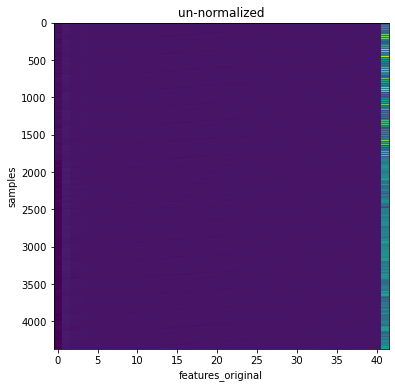

In [16]:
plt.figure(figsize=(6, 6))
plt.imshow(features,interpolation='none')
plt.xlabel('features_original')
plt.ylabel('samples')
plt.axis('auto')
plt.title('un-normalized')
plt.show()

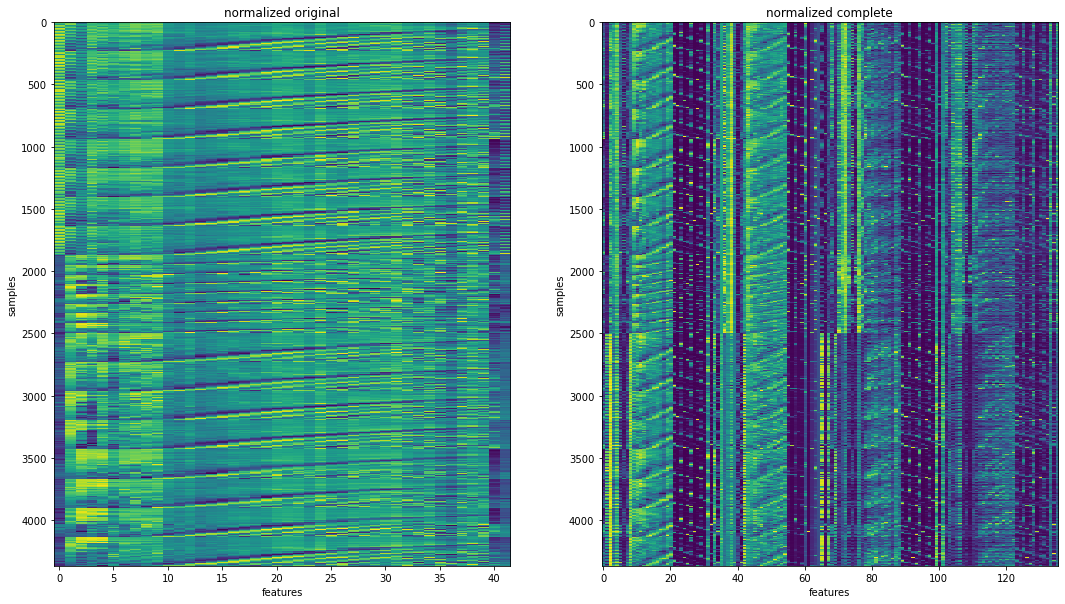

In [17]:
features_norm = scale.minmax_scale(features_audio_complete)

plt.figure(figsize=(18, 10))

plt.subplot(1,2,1)
plt.imshow(features_original,interpolation='none')
plt.xlabel('features')
plt.ylabel('samples')
plt.axis('auto')
plt.title('normalized original')


plt.subplot(1,2,2)
plt.imshow(features_norm,interpolation='none')
plt.xlabel('features')
plt.ylabel('samples')
plt.axis('auto')
plt.title('normalized complete')

plt.show()

## Feature selection

#### Variance thresholding

In [971]:
sel = VarianceThreshold(threshold=0.020)
features_reduct = sel.fit_transform(features_norm)
features_reduct.shape

(4368, 39)

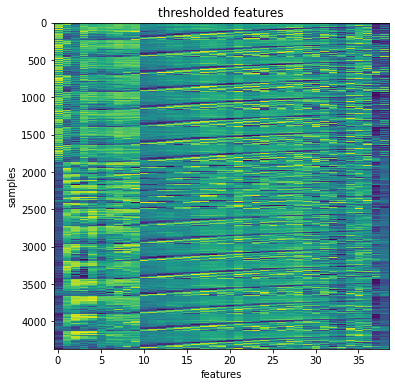

In [972]:
plt.figure(figsize=(6, 6))
plt.imshow(features_reduct,interpolation='none')
plt.xlabel('features')
plt.ylabel('samples')
plt.axis('auto')
plt.title('thresholded features')
plt.show()

### Hand selected

(4368, 13)


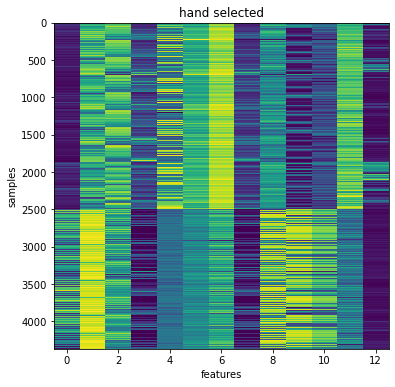

In [1004]:
hand_selection = [1,2,9,34,36,37,38,41,42,65,67,76,109]
features_hand = features_norm[:,hand_selection]
print(features_hand.shape)
plt.figure(figsize=(6, 6))
plt.imshow(features_hand,interpolation='none')
plt.xlabel('features')
plt.ylabel('samples')
plt.axis('auto')
plt.title('hand selected')
plt.show()

### k-best

k = 2 only 1st and 3rd mfcc coefficient

with k = 7 it tourns out to select:[  1  2  3  4 6 zcr sc ]

In [42]:
print((features_original).shape)
k_best =  SelectKBest(chi2, k=2).fit(features_original, fileLable)
# k_best =  SelectKBest(chi2, k=2).fit(features_norm, fileLable)

feature_k_best = k_best.transform(features_original)
# feature_k_best = k_best.transform(features_norm)

# print(k_best.get_support(True))
# print(feature_names[k_best.get_support()])

print(feature_k_best.shape)

(4368, 42)
(4368, 2)


# Split Set

In [43]:
# X_train,X_test,y_train,y_test = train_test_split(features_original, fileLable, test_size = 0.2, random_state =0) # original seelection
# X_train,X_test,y_train,y_test = train_test_split(features_norm, fileLable, test_size = 0.2, random_state =0) # complete
# X_train,X_test,y_train,y_test = train_test_split(features_reduct, fileLable, test_size = 0.2, random_state =0) # variance selected
# X_train,X_test,y_train,y_test = train_test_split(features_hand, fileLable, test_size = 0.2, random_state =0) # hand
X_train,X_test,y_train,y_test = train_test_split(feature_k_best, fileLable, test_size = 0.2, random_state =0) # k-best


#X_train_SpectralFt,X_test_SpectralFt,y_train_SpectralFt,y_test_SpectralFt = train_test_split(spectral_feat_normalized, fileLable, test_size = 0.2)

In [44]:
print(X_train.shape, X_test.shape)
#print(X_train_SpectralFt, X_test_SpectralFt)

(3494, 2) (874, 2)


In [45]:
##GMM
#gmm_0 = 

# SVM: multiclass case

## Define and train a model

In [48]:
SVM_parameters={
    'C': 2,
    'kernel': 'rbf',
    'class_weight' : 'balanced'
}

ss = sklearn.svm.SVC(**SVM_parameters, probability=True)
ss.fit(X_train, y_train)
accuracy = ss.score(X_test, y_test)
print("The accuracy is",format(accuracy))

The accuracy is 0.782608695652174


## Evaluate and Output the Confusion Matrix

Confusion matrix
[[240 110   5]
 [ 64  65   1]
 [  1   9 379]]
Normalized confusion matrix
[[0.67605634 0.30985915 0.01408451]
 [0.49230769 0.5        0.00769231]
 [0.00257069 0.02313625 0.97429306]]


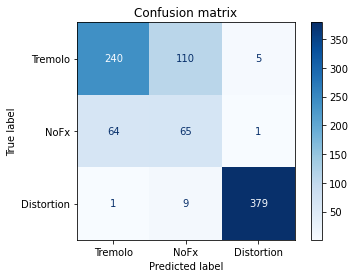

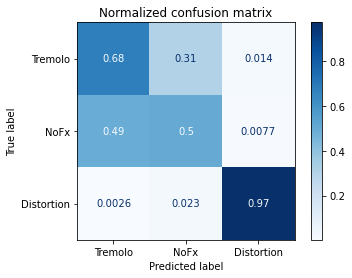

In [49]:
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(ss, X_test, y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()